In [28]:
car.data <- read.table("car", sep = '\t', header = FALSE)

In [29]:
head(car.data)

V1,V2,V3
NIKPRLRSP038060_07012003,7951,0.020039986
NIKPRLRSP038615_16012003,6758,-0.027094260
NIKPRLRSP038615_16012003,6701,0.045907303
NIKPRLRSP039529_29012003,4716,-0.016681205
NIKPRLRSP039048_23012003,6501,0.123901042
NIKPRLRSP039321_27012003,8515,0.003297822


In [30]:
car.val <- as.numeric(car.data$V3) * 100
length(car.val)

[1] 41950

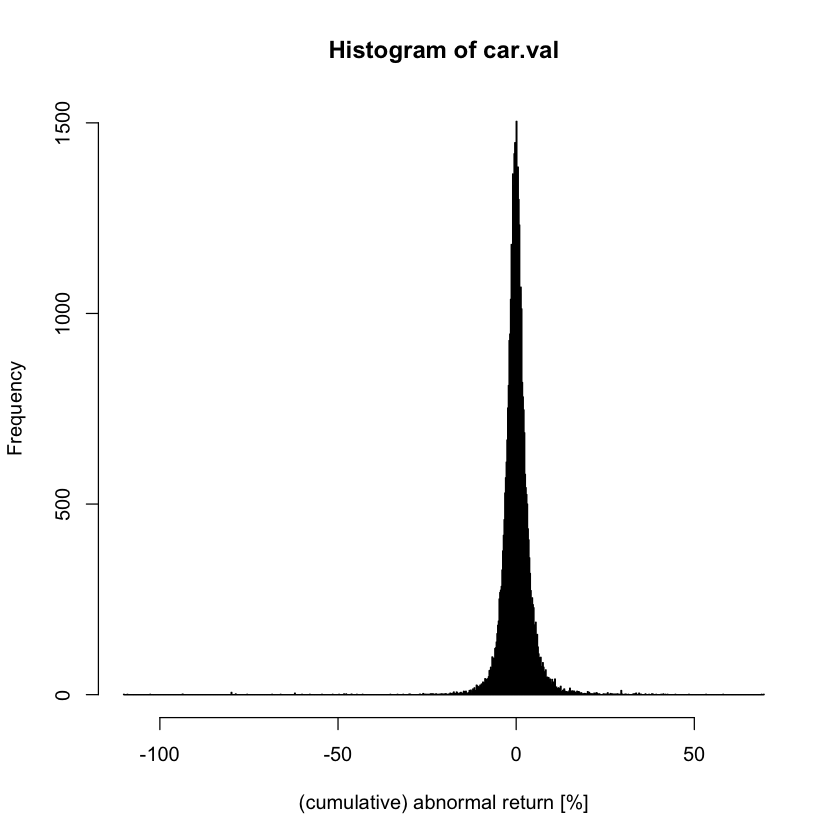

In [42]:
hist(car.val, breaks = 1000, xlim = c(min(car.val),max(car.val)), xlab = "(cumulative) abnormal return [%]")

In [34]:
ks.test(car.val, "pnorm", mean=mean(car.val), sd=sqrt(var(car.val)))

Warning message in ks.test(car.val, "pnorm", mean = mean(car.val), sd = sqrt(var(car.val))):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  car.val
D = 0.11539, p-value < 2.2e-16
alternative hypothesis: two-sided


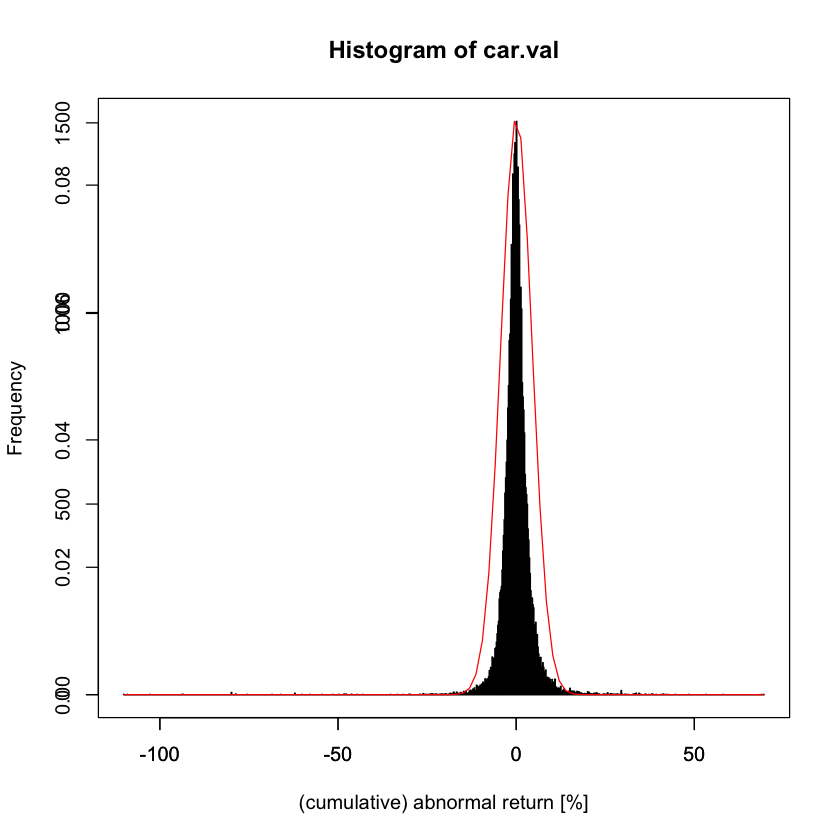

In [45]:
hist(car.val, breaks = 1000, xlim = c(min(car.val),max(car.val)), xlab = "(cumulative) abnormal return [%]")
par(new=T)
curve(dnorm(x, mean=mean(car.val), sd=sqrt(var(car.val))), from=min(car.val), to=max(car.val), col="red", xlab="", ylab="")   # 正規分布を重ね書き

正規分布よりむしろ尖っている

### 基本統計量など

In [50]:
mean(car.val)

[1] 0.08572445

-> 平均すると全体的にはほぼ影響なし。ノイズ(ミスマッチング)が多いだけの可能性もある？

In [51]:
sd(car.val)

[1] 4.392979

In [53]:
max(car.val)
min(car.val)

[1] 69.5556

[1] -110.0685

In [54]:
length(car.val)

[1] 41950

In [57]:
length(car.val[car.val >= 10.])
length(car.val[car.val <= -10.])

[1] 670

[1] 426

-> 最小値はかなり小さいものの、10%以上の効果を与えるようなものを数えると、正方向の効果を与えるものの方が幾分か多い

### 高いCARを示した例

In [67]:
top10 <- car.data[order(car.data$V3, decreasing = TRUE),][1:10,]
top10
# top 10 car

,V1,V2,V3
26997,NIKPRLRSP207638_12122008,8515,0.6955560
2977,NIKPRLRSP044870_17042003,8007,0.6892683
4946,NIKPRLRSP081985_24092004,8007,0.5818154
35902,NIKPRLRSP247771_30032010,8918,0.5335779
36050,NIKPRLRSP247925_31032010,8918,0.4857212
24255,NIKPRLRSP204150_04112008,7873,0.4471570
24223,NIKPRLRSP202327_14102008,8918,0.4253569
35780,NIKPRLRSP217867_14042009,8918,0.4184246
36458,NIKPRLRSP253932_15062010,4344,0.4124118
40704,NIKPRLRSP253929_15062010,4344,0.4124118


In [90]:
print.data <- function(x) {
    out.pr <- system(paste("grep", paste("\"", x$V1, "\"", sep = ""), "data/pressrelease_all.csv", sep = " "), intern = TRUE)
    out.lc <- system(paste("grep -E", paste("\"\t", x$V2, "$\"", sep = ""), "data/listed_company", sep = " "), intern = TRUE)
    print(out.pr)
    print(out.lc)
}

In [91]:
for (i in 1:10) {
    print.data(top10[i,])
}

[1] "NIKPRLRSP207638_12122008\t20081212\t発表日：2008年12月12日函館信用金庫との事業者向け無担保ローン保証業務提携について　アイフル株式会社（本社：京都市　代表取締役社長：福田　吉孝）は、函館信用金庫（本店：函館市大手町２番７号　理事長：黒滝　啓洋）と提携し、平成２０年１２月１５日（月）より、事業者向け無担保ローン（商品名：はこしん事業者用カードローン「バックアップ」）の保証業務の取扱を開始いたします。　当社は、『リテール分野における総合金融企業グループ』を目標とし、『商品の多様化』を推進しております。その経営戦略の一環として、当社の持つ個人向け無担保ローンと事業者向け無担保ローンの与信・審査ノウハウを活用した金融機関との保証業務提携を積極的に推進してまいります。■商品概要　提携先：函館信用金庫　取扱開始日：平成２０年１２月１５日（月）　商品分類：事業者向け無担保ローン　商品名：はこしん事業者用カードローン「バックアップ」　融資対象者：法人及び、個人事業主　融資金額：５０万円以上５００万円以下（１０万円単位）　融資期間：５年以内　融資利率：年１４．０％（保証料含む）　融資形式：当座貸越　返済方式：定額返済　担保：不要　保証人：不要（但し、法人の場合、代表者の保証要）　※商品・サービス内容などの詳細に関しては、直接、函館信用金庫にお問い合わせ願います。【ご参考】提携金融機関数　個人向け無担保ローン・・・４４金融機関　事業者向け無担保ローン・・・８６金融機関"
[1] "アイフル\t京都府京都市下京区烏丸通五条上る高砂町381-1\t8515"
[1] "NIKPRLRSP044870_17042003\t20030417\t発表日：２００３年４月１７日アミノ酸加工による製品「アミノテック（Ｒ）」の展開について　帝人ファイバー株式会社（本社：大阪市中央区、社長：野口　泰稔）は、ここ数年、差別化素材のファッション分野での採用を図ってきており、その一環としてアミノ酸加工による素材の開発に取り組んできましたが、このたび株式会社高島屋ならびに株式会社レナウンの協力を得て、アパレル製品としての活用・展開が可能となりました。　帝人ファイバーは、このアミノ酸加工による生地および製品の総称ブランドを「アミノテック（Ｒ）」として展開すること

-> "高島", "ランド", "アーク"でfalse-positive hit

### マッチング数が多い企業名はfalse-positive hitが多い企業名？

In [92]:
code <- car.data$V2

In [93]:
head(code)

[1] 7951 6758 6701 4716 6501 8515

In [141]:
codes <- sort(table(code), decreasing = TRUE)
codes.names <- names(codes)

head(codes.names)

[1] "9984" "9437" "6758" "7951" "6701" "6702"

In [140]:
print.comp <- function(x) {
    out.lc <- system(paste("grep -E", paste("\"\t", x, "$\"", sep = ""), "data/listed_company", sep = " "), intern = TRUE)
    print(out.lc)
}

In [145]:
for (i in 1:100) {
    print.comp(codes.names[i])
    print(codes[[i]])
}

[1] "ソフトバンク\t東京都港区東新橋1-9-1\t9984"
[1] 1406
[1] "ＮＴＴドコモ\t東京都千代田区永田町2丁目11-1\t9437"            
[2] "エヌ・ティ・ティ・ドコモ\t東京都千代田区永田町2丁目11-1\t9437"
[1] 1241
[1] "ソニー\t東京都港区港南1丁目7-1\t6758"
[1] 1047
[1] "ヤマハ\t静岡県浜松市中区中沢町10-1\t7951"
[1] 686
[1] "日本電気\t東京都港区芝5丁目7-1\t6701"
[1] 678
[1] "富士通\t東京都港区東新橋1-5-2\t6702"
[1] 637
[1] "ヤフー\t東京都港区赤坂9丁目7-1\t4689"
[1] 616
[1] "東芝\t東京都港区芝浦1丁目1-1\t6502"
[1] 609
[1] "コクヨ\t大阪府大阪市東成区大今里南6丁目1-1\t7984"
[1] 566
[1] "凸版印刷\t東京都千代田区神田和泉町1番地\t7911"
[1] 559
[1] "野村総合研究所\t東京都千代田区丸の内1丁目6-5\t4307"
[1] 529
[1] "伊藤園\t東京都渋谷区本町3丁目47-10\t2593"
[1] 519
[1] "日立製作所\t東京都千代田区丸の内1丁目6-6\t6501"
[1] 499
[1] "日本ユニシス\t東京都江東区豊洲1-1-1\t8056"
[1] 499
[1] "森永製菓\t東京都港区芝5丁目33-1\t2201"
[1] 490
[1] "三井物産\t東京都千代田区大手町1丁目2-1\t8031"
[1] 474
[1] "日本電信電話\t東京都千代田区大手町2丁目3-1\t9432"
[1] 461
[1] "三菱電機\t東京都千代田区丸の内2丁目7-3\t6503"
[1] 442
[1] "電通\t東京都港区東新橋1-8-1\t4324"
[1] 422
[1] "ランド\t神奈川県横浜市西区北幸二丁目８番29号\t8918"
[1] 412
[1] "ファミリーマート\t東京都豊島区東池袋3-1-1\t8028"
[1] 404
[1] "住友商事\t東京都中央区晴海1丁目8-11\t8053"
[1] 403
[1] "ＧＭＯインターネット\

-> 全体的には複雑度の低い企業名が占める割合はそこまで高くなさそう？

同じ証券コード、同じ住所で異なる企業名を持つものがあるが、アブノーマルリターンの結果をまとめるところで縮約されているはず